<h1 style = "font-size: 30px; text-align: center;">Machine Learning </h1>
<h1 style = "font-size: 30px; text-align: center;">HW 4</h1>
<h2 style = "font-size: 25px; text-align: center;">Supprt Vector Machine</h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Name: Toktam Sameie</h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Student Id: 810896054</h2>
<h4 style="text-align: center">Spring 1400</h4>

<h1 style = "font-size: 25px; text-align: center;">Question 3 </h1>

In [406]:
import numpy as np
import random
# import pondas 
import matplotlib.pyplot as plt
import copy

In [407]:
x1 = np.random.uniform(0,1.5,150).reshape(150,1)
x2 = np.random.uniform(0,1.5,150).reshape(150,1)
x3 = np.random.uniform(2,3.5,150).reshape(150,1)
x4 = np.random.uniform(2,3.5,150).reshape(150,1)

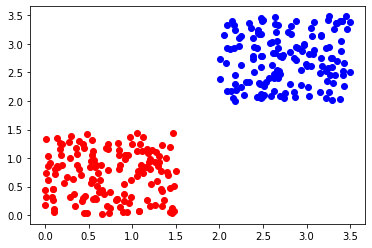

In [408]:
plt.plot(x1, x2, 'ro', x3, x4, 'bo')
plt.show()

In [409]:
class1 = np.concatenate((x1,x2),axis=1)
class2 = np.concatenate((x3,x4),axis=1)
class1 = np.c_[ class1 , np.ones(150) ] 
class2 = np.c_[ class2 , (-1)*np.ones(150) ] 

In [410]:
np.random.shuffle(class1)
np.random.shuffle(class2)
test1 = copy.deepcopy(class1[0:29,:])
test2 = copy.deepcopy(class2[0:29,:])
train1 = copy.deepcopy(class1[30:,:])
train2 = copy.deepcopy(class2[30:,:])

In [411]:
train = np.concatenate((train1, train2), axis=0)
np.random.shuffle(train)

In [412]:
X = copy.deepcopy(train[:,0:2])
Y = copy.deepcopy(train[:,2])
X = np.c_[ np.ones(240) , X ] 

In [413]:
C = 10000 
alpha = 0.000001

In [414]:
def Gradient_cost_Function(theta, X_batch, Y_batch):
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
    margin = 1 - (Y_batch * np.dot(X_batch, theta))
    gradient_cost = np.zeros(len(theta))
    if max(0, margin) == 0:
        gradient_cost += theta
    else:
        gradient_cost += theta - (C * Y_batch[0] * X_batch[0])
    gradient_cost = gradient_cost/len(Y_batch)  
    return gradient_cost

In [415]:
def SVM(X, Y):
    theta = np.zeros(3)
    for epoch in range(5000): 
        for i, x in enumerate(X):
            g_cost = Gradient_cost_Function(theta, x, Y[i])
            theta = theta - (alpha * g_cost)
            
    return theta

In [416]:
w = SVM(X,Y)

In [417]:
w

array([ 5.40287435, -2.02646411, -1.03805783])

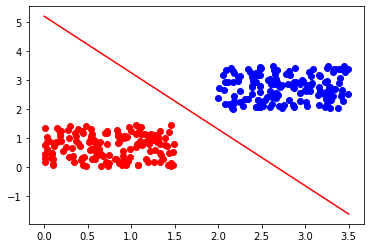

In [418]:
plt.plot(x1, x2, 'ro', x3, x4, 'bo')
x = np.linspace(0,3.5,100)
y = w[1]/(-w[2])*x + w[0]/(-w[2])
plt.plot(x, y, '-r')
plt.show()

<h1 style = "font-size: 20px;">Test </h1>

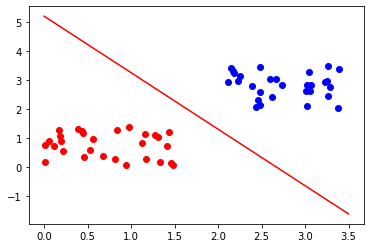

In [419]:
plt.plot(test1[:,0], test1[:,1], 'ro', test2[:,0], test2[:,1], 'bo')
x = np.linspace(0,3.5,100)
y = w[1]/(-w[2])*x + w[0]/(-w[2])
plt.plot(x, y, '-r', label='y=2x+1')
plt.show()

<h1 style = "font-size: 25px; text-align: center;">Question 4 <h1/>

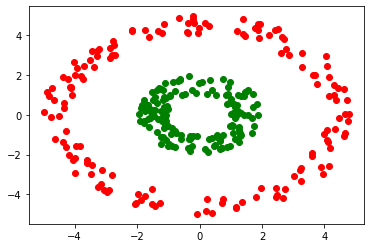

In [456]:
import numpy 
n = 150
phi1 = numpy.random.uniform(0, 2*numpy.pi, n).reshape(150,1)
r1= numpy.random.uniform(1, 2, n).reshape(150,1)
X1 = r1 * numpy.cos(phi1)
Y1 = r1 * numpy.sin(phi1)
phi2 = numpy.random.uniform(0, 2*numpy.pi, n).reshape(150,1)
r2 = numpy.random.uniform(4, 5, n).reshape(150,1)
X2 = r2 * numpy.cos(phi2)
Y2 = r2 * numpy.sin(phi2)
plt.plot(X1, Y1, 'go',X2, Y2, 'ro')
plt.show()

In [457]:
class1 = np.concatenate((X1,Y1),axis=1)
class2 = np.concatenate((X2,Y2),axis=1)
class1 = np.c_[ class1 , np.ones(150) ] 
class2 = np.c_[ class2 , (-1)*np.ones(150) ] 

In [473]:
np.random.shuffle(class1)
np.random.shuffle(class2)
test1 = copy.deepcopy(class1[0:30,:])
test2 = copy.deepcopy(class2[0:30,:])
train1 = copy.deepcopy(class1[30:,:])
train2 = copy.deepcopy(class2[30:,:])

In [474]:
train = np.concatenate((train1, train2), axis=0)
np.random.shuffle(train)

In [476]:
X = copy.deepcopy(train[:,0:2])
Y = copy.deepcopy(train[:,2])
X = np.c_[ np.ones(240) , X ] 

In [438]:
theta_4 = SVM(X,Y)


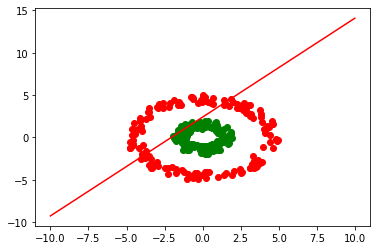

In [439]:
plt.plot(X1, Y1, 'go',X2, Y2, 'ro')
x = np.linspace(-10,10,100)
y = theta_4[1]/(-theta_4[2])*x + theta_4[0]/(-theta_4[2])
plt.plot(x, y, '-r', label='y=2x+1')
plt.show()

<h1 style = "font-size: 25px; text-align: center;">Question 5 <h1/>

In [452]:
def kernel(X):
    kernel_x = np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            kernel_x[i][j] = np.matmul(X[i].T,X[j]+1)**3
    return kernel_x 

In [461]:
def nonlinear_kernel(X , Y ):
    kernel_x = kernel(X)
    beta = np.zeros(240)
    for epoch in range(5000): 
        ascent = Y - np.matmul(kernel_x,beta)
        beta = beta + (alpha * ascent)
    theta = np.matmul(beta.T,X)       
    return theta

In [462]:
theta = nonlinear_kernel(X,Y)

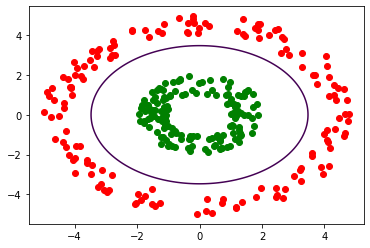

In [469]:
plt.plot(X1, Y1, 'go',X2, Y2, 'ro')
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x,y)
F = +theta[0] - theta[1]*X**2 - theta[1]*Y**2 
plt.contour(X,Y,F,[2])
plt.show()

<h1 style = "font-size: 20px;">Test </h1>

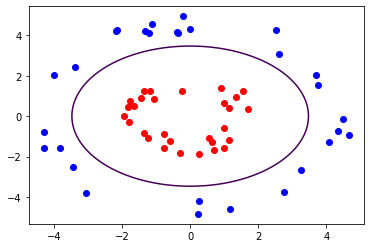

In [480]:
plt.plot(test1[:,0], test1[:,1], 'ro', test2[:,0], test2[:,1], 'bo')
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x,y)
F = +theta[0] - theta[1]*X**2 - theta[1]*Y**2 
plt.contour(X,Y,F,[2])
plt.show()